In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

%config InlineBackend.figure_format = 'retina'

In [3]:
# 데이터 읽어오기
path = '/content/drive/MyDrive/DataForSudy/boston.csv'
data = pd.read_csv(path)

In [4]:
# target 분리
target = 'medv'

x = data.drop(columns=target)
y = data[target]

In [6]:
# 평가용 학습용 데이터 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [7]:
# Grid Search로 튜닝
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

In [8]:
# 파라미터 선언
param = {'max_depth': range(1,51)}

In [9]:
# 모델 선언
model = GridSearchCV(DecisionTreeRegressor(random_state=1), param, cv=5, scoring='r2')

In [10]:
# 모델 학습
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': range(1, 51)}, scoring='r2')

In [11]:
# 결과 확인

# 최적의 파라미터
print(model.best_params_)

# 최고성능
print(model.best_score_)

{'max_depth': 6}
0.7474883885080482


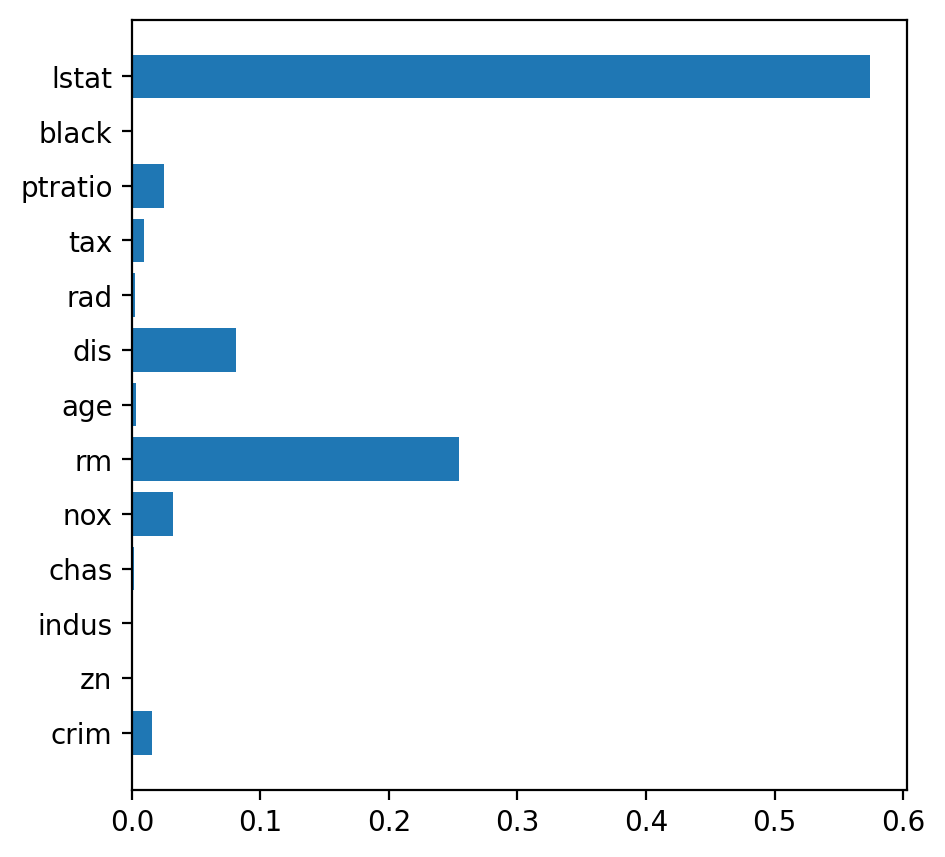

In [12]:
# 변수 중요도 시각화
plt.figure(figsize=(5,5))
plt.barh(y=list(x), width=model.best_estimator_.feature_importances_)
plt.show()

In [14]:
# 성능 평가

# 예측하기
y_pred = model.predict(x_test)

# 평가
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MAE: 2.763239793643037
R2: 0.8477248406093285
